# ფინალური პროექტი: წიგნების ბაზრის ანალიზი

## პროექტის მიმოხილვა
მოცემული პროექტის მიზანია ქართულ ბაზარზე არსებული პოპულარული წიგნების მონაცემების შეგროვება, დამუშავება და ვიზუალიზაცია. პროექტი დაყოფილია სამ ეტაპად, როგორც ეს დავალებაშია მოთხოვნილი.

## ეტაპი 1: მონაცემების მოგროვება
ამ ეტაპზე ჩვენ ვიყენებთ `pandas` ბიბლიოთეკას მონაცემების სტრუქტურირებისთვის და შესანახად. მონაცემები მოიცავს წიგნის სათაურს, ავტორს, ფასს, კატეგორიას და რეიტინგს.

In [4]:
import pandas as pd

# მონაცემების წაკითხვა CSV ფაილიდან
df = pd.read_csv('books_data.csv')

# პირველი რამდენიმე ჩანაწერის ნახვა
print("მონაცემები წარმატებით ჩაიტვირთა:")
display(df.head())

მონაცემები წარმატებით ჩაიტვირთა:


,title,author,price,category,rating
0,ვეფხისტყაოსანი,შოთა რუსთაველი,25.5,კლასიკა,5.0
1,დათა თუთაშხია,ჭაბუა ამირეჯიბი,18.9,რომანი,4.9
2,სამოსელი პირველი,გურამ დოჩანაშვილი,22.0,რომანი,4.8
3,ჯაყოს ხიზნები,მიხეილ ჯავახიშვილი,15.0,კლასიკა,4.7
4,თეთრი საყელო,მიხეილ ჯავახიშვილი,12.5,კლასიკა,4.6


## ეტაპი 2: მონაცემების დამუშავება და ანალიზი
ამ ეტაპზე ჩვენ დავამუშავებთ მონაცემებს და გამოვყოფთ სამ საინტერესო მიგნებას:
1. საშუალო ფასი კატეგორიების მიხედვით.
2. ყველაზე მაღალრეიტინგული ჟანრები.
3. ავტორები, რომელთა წიგნებიც ყველაზე ძვირადღირებულია.

In [5]:
# 1. საშუალო ფასი კატეგორიების მიხედვით
avg_price_by_category = df.groupby('category')['price'].mean().sort_values(ascending=False)
print("საშუალო ფასი კატეგორიების მიხედვით:")
print(avg_price_by_category)

# 2. საშუალო რეიტინგი კატეგორიების მიხედვით
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("\nსაშუალო რეიტინგი კატეგორიების მიხედვით:")
print(avg_rating_by_category)

# 3. ყველაზე ძვირადღირებული წიგნების ტოპ 5
top_expensive_books = df.nlargest(5, 'price')[['title', 'author', 'price']]
print("\nყველაზე ძვირადღირებული 5 წიგნი:")
print(top_expensive_books)

საშუალო ფასი კატეგორიების მიხედვით:
category
ფენტეზი       28.000000
ისტორიული     22.000000
რომანი        20.133333
კლასიკა       14.583333
ანტიუტოპია    14.000000
დრამა         14.000000
საბავშვო      12.000000
პოეზია         8.166667
Name: price, dtype: float64

საშუალო რეიტინგი კატეგორიების მიხედვით:
category
საბავშვო      5.000000
პოეზია        4.900000
რომანი        4.866667
ისტორიული     4.850000
ფენტეზი       4.850000
ანტიუტოპია    4.800000
კლასიკა       4.733333
დრამა         4.600000
Name: rating, dtype: float64

ყველაზე ძვირადღირებული 5 წიგნი:
                             title                   author  price
16  ჰარი პოტერი და ფილოსოფიური ქვა            ჯ.კ. როულინგი   28.0
17   ჰარი პოტერი და საიდუმლო ოთახი            ჯ.კ. როულინგი   28.0
0                   ვეფხისტყაოსანი           შოთა რუსთაველი   25.5
12                მთვარის მოტაცება  კონსტანტინე გამსახურდია   24.0
2                 სამოსელი პირველი        გურამ დოჩანაშვილი   22.0


## ეტაპი 3: ვიზუალიზაცია
მონაცემების უკეთ აღსაქმელად გამოვიყენებთ `matplotlib` და `seaborn` ბიბლიოთეკებს.

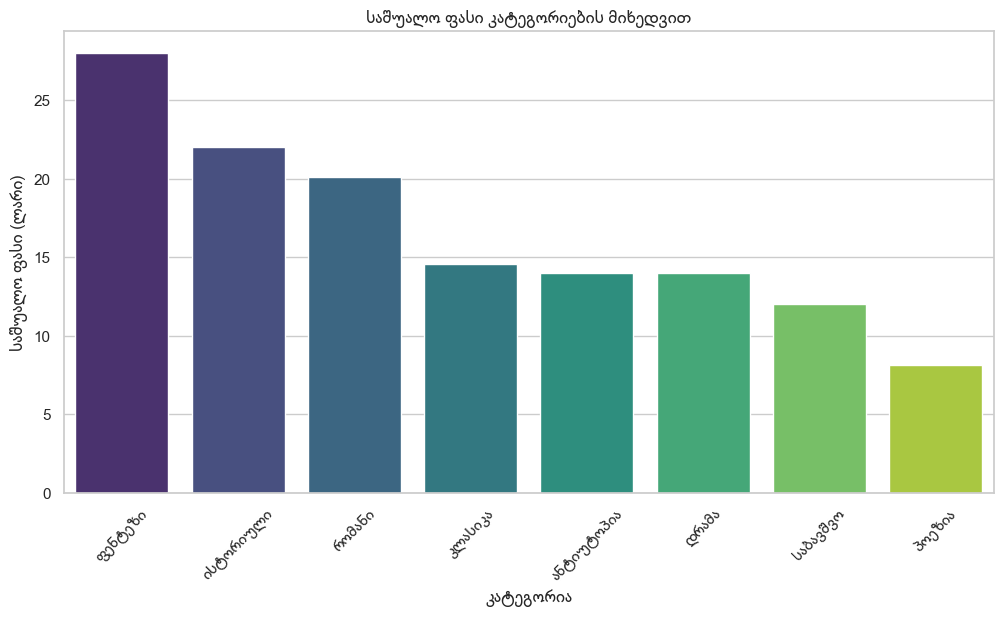

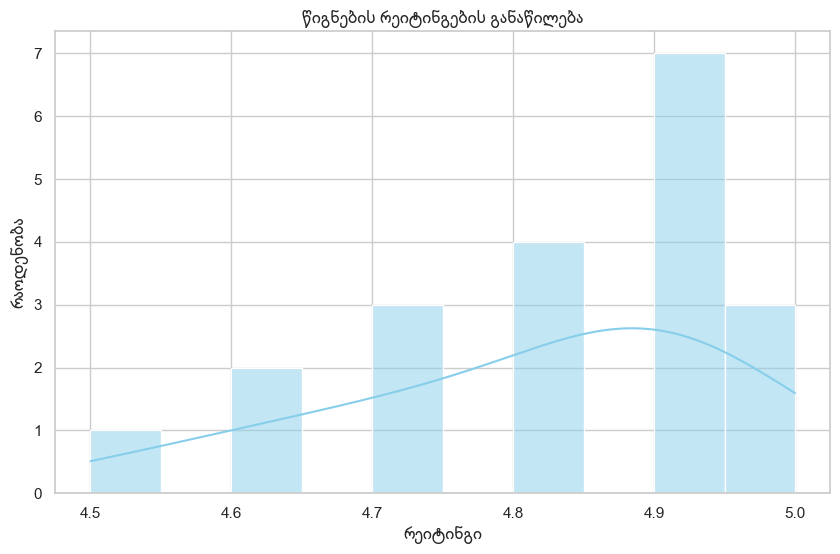

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# ვიზუალიზაციის სტილის დაყენება
sns.set(style="whitegrid")

# ქართული ფონტის გასწორება (უნივერსალური)
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'Arial Unicode MS'
else:  # Windows / Linux
    plt.rcParams['font.family'] = 'Sylfaen'

# 1. ფასების განაწილება კატეგორიების მიხედვით
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_category.index, 
            y=avg_price_by_category.values, 
            hue=avg_price_by_category.index, 
            legend=False, 
            palette="viridis")
plt.title('საშუალო ფასი კატეგორიების მიხედვით')
plt.xlabel('კატეგორია')
plt.ylabel('საშუალო ფასი (ლარი)')
plt.xticks(rotation=45)
plt.show()

# 2. რეიტინგების განაწილება
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title('წიგნების რეიტინგების განაწილება')
plt.xlabel('რეიტინგი')
plt.ylabel('რაოდენობა')
plt.show()

## დასკვნა
ჩატარებული ანალიზის შედეგად გამოიკვეთა, რომ ფენტეზის ჟანრის წიგნები გამოირჩევა მაღალი ფასით, ხოლო საბავშვო და კლასიკური ლიტერატურა სტაბილურად მაღალ რეიტინგს ინარჩუნებს მომხმარებლებში.